In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
import matplotlib.pyplot as plt
import requests

In [10]:
email = "abhishek.deshpande1131@gmail.com"
key   = "ecruram76"

In [11]:
## California:
response = requests.get(f'https://aqs.epa.gov/data/api/list/countiesByState?email={email}&key={key}&state=06')
js = response.json()
counties = pd.DataFrame(js['Data'])
print(counties)

   code value_represented
0   001           Alameda
1   003            Alpine
2   005            Amador
3   007             Butte
4   009         Calaveras
5   011            Colusa
6   013      Contra Costa
7   015         Del Norte
8   017         El Dorado
9   019            Fresno
10  021             Glenn
11  023          Humboldt
12  025          Imperial
13  027              Inyo
14  029              Kern
15  031             Kings
16  033              Lake
17  035            Lassen
18  037       Los Angeles
19  039            Madera
20  041             Marin
21  043          Mariposa
22  045         Mendocino
23  047            Merced
24  049             Modoc
25  051              Mono
26  053          Monterey
27  055              Napa
28  057            Nevada
29  059            Orange
30  061            Placer
31  063            Plumas
32  065         Riverside
33  067        Sacramento
34  069        San Benito
35  071    San Bernardino
36  073         San Diego
37  075     

In [12]:
state = '06' #california - 06
county = '033' #lake - 033(both avail//61 entries@site 3002), glenn -021(only pm10 at 0003 site), mendocino-045(only pm25)
#tehama -103(pm25-6756vals, pm10-41vals), trinity -105(no data), shasta -NA 

# 42101                         Carbon monoxide
# 42401                          Sulfur dioxide
# 42602                  Nitrogen dioxide (NO2)
# 44201                                   Ozone
# 81102                   PM10 Total 0-10um STP
# 88101                PM2.5 - Local Conditions
# 88502  Acceptable PM2.5 AQI & Speciation Mass

pm25 = '88101'
pm10 = '81102'

In [13]:
response = requests.get(f'https://aqs.epa.gov/data/api/list/sitesByCounty?email={email}&key={key}&state={state}&county={county}')
js = response.json()
sites = pd.DataFrame(js['Data'])
print(sites.shape)

print(sites)
for i in sites['code']:
    response = requests.get(f'https://aqs.epa.gov/data/api/sampleData/bySite?email={email}&key={key}&param={pm25}&bdate=20200101&edate=20201231&state={state}&county={county}&site={i}')
    js = response.json()
    data = pd.DataFrame(js['Data'])
    print(response, i, data.shape)

(10, 2)
   code                        value_represented
0  0002                                     None
1  0003                                     None
2  1001                                     None
3  2001                      Lakeport-Forbes St.
4  3001                  Lakeport-Lakeport Blvd.
5  3002                  Lakeport-S. Main Street
6  3010                         ANDERSON SPRINGS
7  3011                                GLENBROOK
8  3012                       HOBERG-PINE SUMMIT
9  3013  TRAILER AT RESIDENCE.  RURAL COMMUNITY.
<Response [200]> 0002 (0, 0)
<Response [200]> 0003 (0, 0)
<Response [200]> 1001 (0, 0)
<Response [200]> 2001 (0, 0)
<Response [200]> 3001 (0, 0)
<Response [200]> 3002 (61, 29)
<Response [200]> 3010 (0, 0)
<Response [200]> 3011 (0, 0)
<Response [200]> 3012 (0, 0)
<Response [200]> 3013 (0, 0)


In [14]:
#### variables
county_name = 'Lake County'
sitecode = '3002'

y1='2020'
y2='2019'

(61, 29)
    year  month  unique days
0   2020      1            5
1   2020      2            5
2   2020      3            5
3   2020      4            5
4   2020      5            5
5   2020      6            5
6   2020      7            5
7   2020      8            6
8   2020      9            5
9   2020     10            5
10  2020     11            5
11  2020     12            5


(63, 29)
    year  month  unique days
0   2019      1            5
1   2019      2            5
2   2019      3            6
3   2019      4            5
4   2019      5            5
5   2019      6            5
6   2019      7            5
7   2019      8            6
8   2019      9            5
9   2019     10            5
10  2019     11            5
11  2019     12            6


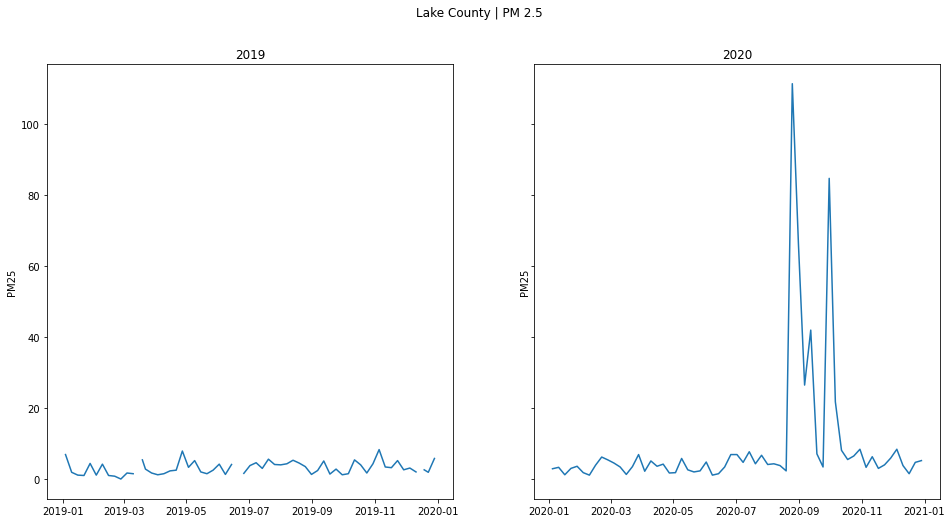

In [15]:
#PM2.5
#2020

response = requests.get(f'https://aqs.epa.gov/data/api/sampleData/bySite?email={email}&key={key}&param={pm25}&bdate={y1}0101&edate={y1}1231&state={state}&county={county}&site={sitecode}')
js = response.json()
data1= pd.DataFrame(js['Data'])
print(data1.shape)

ds1 = data1.sort_values(['date_gmt', 'time_gmt'])
ds1['date_gmt'] = pd.to_datetime(ds1['date_gmt'])
# ds1.plot(x='date_gmt', y='sample_measurement')

print(ds1.date_gmt.groupby([ds1.date_gmt.dt.year, ds1.date_gmt.dt.month])
  .nunique()
  .rename_axis(['year', 'month'])
  .reset_index(name='unique days'))

fig1 = px.scatter(ds1, x="date_gmt", y="sample_measurement", title = 'PM 2.5 | 2020', color = ds1.date_gmt.dt.month)
fig1.show()

##########################################################################################################

#2019

response = requests.get(f'https://aqs.epa.gov/data/api/sampleData/bySite?email={email}&key={key}&param={pm25}&bdate={y2}0101&edate={y2}1231&state={state}&county={county}&site={sitecode}')
js = response.json()
data2= pd.DataFrame(js['Data'])
print(data2.shape)

ds2 = data2.sort_values(['date_gmt', 'time_gmt'])
ds2['date_gmt'] = pd.to_datetime(ds2['date_gmt'])
# ds2.plot(x='date_gmt', y='sample_measurement')

print(ds2.date_gmt.groupby([ds2.date_gmt.dt.year, ds2.date_gmt.dt.month])
  .nunique()
  .rename_axis(['year', 'month'])
  .reset_index(name='unique days'))

fig2 = px.scatter(ds2, x="date_gmt", y="sample_measurement", title = 'PM 2.5 | 2019', color = ds2.date_gmt.dt.month)
fig2.show()

##########################################################################################################

fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey=True)
fig.suptitle(f'{county_name} | PM 2.5')
ax[0].plot(ds2['date_gmt'], ds2['sample_measurement'])
ax[0].set(title = '2019', ylabel = 'PM25')
ax[1].plot(ds1['date_gmt'], ds1['sample_measurement'])
ax[1].set(title = '2020', ylabel = 'PM25')

plt.show()

    year  month  unique days
0   2020      1            5
1   2020      2            5
2   2020      3            5
3   2020      4            5
4   2020      5            5
5   2020      6            5
6   2020      7            5
7   2020      8            6
8   2020      9            5
9   2020     10            5
10  2020     11            5
11  2020     12            5


(64, 29)
    year  month  unique days
0   2019      1            5
1   2019      2            5
2   2019      3            6
3   2019      4            5
4   2019      5            6
5   2019      6            5
6   2019      7            5
7   2019      8            6
8   2019      9            5
9   2019     10            5
10  2019     11            5
11  2019     12            6


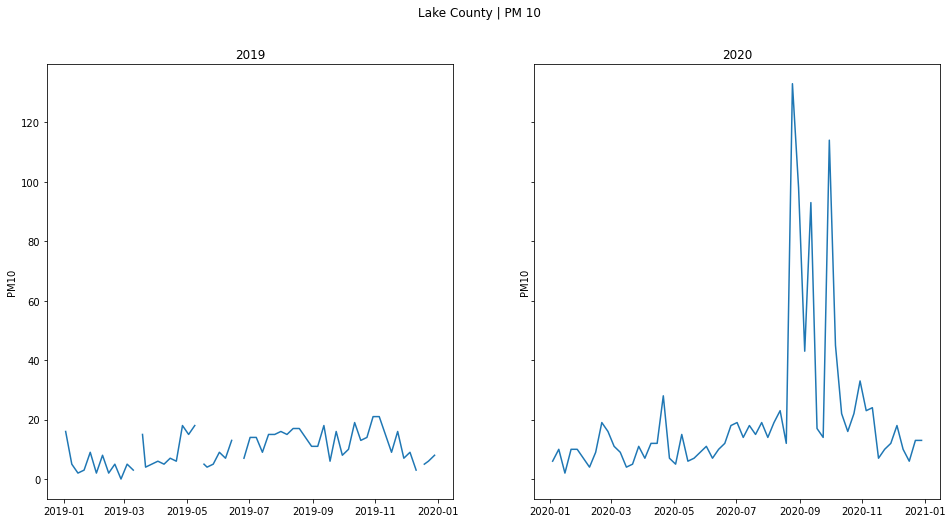

In [16]:
#PM10
#2020

response = requests.get(f'https://aqs.epa.gov/data/api/sampleData/bySite?email={email}&key={key}&param={pm10}&bdate={y1}0101&edate={y1}1231&state={state}&county={county}&site={sitecode}')
js = response.json()
data01= pd.DataFrame(js['Data'])

ds01 = data01.sort_values(['date_gmt', 'time_gmt'])
ds01['date_gmt'] = pd.to_datetime(ds01['date_gmt'])
# ds01.plot(x='date_gmt', y='sample_measurement')

print(ds01.date_gmt.groupby([ds01.date_gmt.dt.year, ds01.date_gmt.dt.month])
  .nunique()
  .rename_axis(['year', 'month'])
  .reset_index(name='unique days'))

fig3 = px.scatter(ds01, x="date_gmt", y="sample_measurement", title = 'PM 10 | 2020', color = ds01.date_gmt.dt.month)
fig3.show()

##########################################################################################################

#2019

response = requests.get(f'https://aqs.epa.gov/data/api/sampleData/bySite?email={email}&key={key}&param={pm10}&bdate={y2}0101&edate={y2}1231&state={state}&county={county}&site={sitecode}')
js = response.json()
data02= pd.DataFrame(js['Data'])
print(data02.shape)

ds02 = data02.sort_values(['date_gmt', 'time_gmt'])
ds02['date_gmt'] = pd.to_datetime(ds02['date_gmt'])
# ds2.plot(x='date_gmt', y='sample_measurement')

print(ds02.date_gmt.groupby([ds02.date_gmt.dt.year, ds02.date_gmt.dt.month])
  .nunique()
  .rename_axis(['year', 'month'])
  .reset_index(name='unique days'))

fig4 = px.scatter(ds02, x="date_gmt", y="sample_measurement", title = 'PM 10 | 2019', color = ds02.date_gmt.dt.month)
fig4.show()

##########################################################################################################

fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey=True)
fig.suptitle(f'{county_name} | PM 10')
ax[0].plot(ds02['date_gmt'], ds02['sample_measurement'])
ax[0].set(title = '2019', ylabel = 'PM10')
ax[1].plot(ds01['date_gmt'], ds01['sample_measurement'])
ax[1].set(title = '2020', ylabel = 'PM10')

plt.show()


In [18]:
ds1=ds1.resample('M', label='right', closed = 'right', on='date_gmt').mean().reset_index().sort_values(by='date_gmt')
ds2=ds2.resample('M', label='right', closed = 'right', on='date_gmt').mean().reset_index().sort_values(by='date_gmt')
ds01=ds01.resample('M', label='right', closed = 'right', on='date_gmt').mean().reset_index().sort_values(by='date_gmt')
ds02=ds02.resample('M', label='right', closed = 'right', on='date_gmt').mean().reset_index().sort_values(by='date_gmt')

### 2019 ###
xlist = ds2["sample_measurement"]
xlist = np.asarray(xlist)
ylist = ds02["sample_measurement"]
ylist = np.asarray(ylist)
merged_list = tuple(zip(xlist, ylist))

### 2020 ###
xlist1 = ds1["sample_measurement"]
xlist1 = np.asarray(xlist1)
ylist1 = ds01["sample_measurement"]
ylist1 = np.asarray(ylist1)
merged_list1 = tuple(zip(xlist1, ylist1))

fig= go.Figure()


fig.add_trace(go.Scatter(x=ds2["sample_measurement"], y=ds02["sample_measurement"], mode = 'markers', name="2019"))

fig.add_trace(go.Scatter(x=ds1["sample_measurement"], y=ds01["sample_measurement"], mode = 'markers', name="2020"))


month_19 = ['Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sep19','Oct19','Nov19','Dec19']
month_20 = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20']
num_month = [0,1,3,5,7,9,11] 

month_list = list(map(lambda x, y:(x,y), month_19, month_20)) 

for i in num_month:
    fig.add_annotation(
                x=merged_list[i][0],
                y=merged_list[i][1],
                text= month_list[i][0],
    showarrow=True,
            font=dict(
                family="Courier New, monospace",
                size=13,
                color="#ffffff"
                ),
            align="center",
            arrowhead=6,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#636363",
            ax=0,
            ay=-30,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=1,
            bgcolor="#ff7f0e",
            opacity=0.7)


    fig.add_annotation(
                x=merged_list1[i][0],
                y=merged_list1[i][1],
                text= month_list[i][1],
    showarrow=True,
            font=dict(
                family="Courier New, monospace",
                size=13,
                color="#ffffff"
                ),
            align="center",
            arrowhead=6,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#636363",
            ax=0,
            ay=-30,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=1,
            bgcolor="#ff7f0e",
            opacity=0.7)

    fig.update_annotations(visible=True)

###################################### joining corresponding months #################

for i in num_month:
    fig.add_shape(type="line",
    x0=merged_list[i][0], y0=merged_list[i][1], x1=merged_list1[i][0], y1=merged_list1[i][1],
    line=dict(
        color="LightSeaGreen",
        width=4,
        dash="dashdot",
    )
             )

####################################################################################
fig.update_layout(
    showlegend=True,
    title={
        'text': f" {county_name} | {y2} vs {y1}",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="PM 2.5",
    yaxis_title="PM 10",
    annotations=[
        dict(
            xref="x",
            yref="y",
        )
    ]
)
fig.show()
fig.write_html(f"{county_name}_pm25-pm10_{y2}-{y1}.html")